# Final Assignment 

Take care, that collaboration in solving the assignment is not allowed and can lead to non-passing of the asssigment. I will check the solutions for similarities. Solve the tasks before September 27th 2023. You are only allowed to import the following modules:

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import pickle
import re


import plotly.graph_objects as go
import plotly.express as px

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import json

In [258]:
import sys
!{sys.executable} -m pip install -U kaleido

## 1. Data preprocessing and plots

**1.1** Import 'players_21.csv' as a pandas data dataframe. Define a column ("weekday_born") that contains the name of weekday the player was born.

In [4]:
df = pd.read_csv('players_21.csv')

In [98]:
df['dob'] = pd.to_datetime(df['dob'])
df['weekday_born'] = df['dob'].dt.day_name()
df['weekday_born']

0        Wednesday
1          Tuesday
2         Thursday
3           Sunday
4        Wednesday
           ...    
18939     Saturday
18940       Monday
18941    Wednesday
18942     Thursday
18943    Wednesday
Name: weekday_born, Length: 18944, dtype: object

In [306]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

**1.2** Apply a filter to a given DataFrame to display only the players who were born on a Friday the 13th. Then, sort the remaining players in the DataFrame by their age in descending order.

In [117]:
born_fri_13 = df[(df['weekday_born'] == 'Friday') & (df['dob'].dt.day == 13)].sort_values(by='age',ascending=False)
print(born_fri_13)

       sofifa_id                                         player_url  \
7188      215130  https://sofifa.com/player/215130/nelson-ibanez...   
7984      163303  https://sofifa.com/player/163303/glenn-whelan/...   
7965      135043  https://sofifa.com/player/135043/anders-lindeg...   
17473     258113  https://sofifa.com/player/258113/alvaro-garcia...   
5979      176542  https://sofifa.com/player/176542/carmelo-valen...   
...          ...                                                ...   
7316      243057  https://sofifa.com/player/243057/neco-williams...   
11977     256894  https://sofifa.com/player/256894/angel-baena-p...   
17922     254999  https://sofifa.com/player/254999/kodai-dohi/21...   
5407      252179  https://sofifa.com/player/252179/jakub-markovi...   
18833     258762  https://sofifa.com/player/258762/mackenzie-cha...   

          short_name                          long_name  age        dob  \
7188       N. Ibáñez               Nelson Martín Ibáñez   38 1981-11-13 

**1.3** Show the player with the highest Body Mass Index (BMI) for each club ('club_name'). Display BMI, the position in the team ('team_position'), the name ('short_name'), and the market value in millions.

In [118]:
df['club_name'].unique().size

682

In [119]:
pd.set_option('display.max_columns', None)
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,weekday_born,BMI,market_value_millions
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,Wednesday,24.913495,67.500
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,Tuesday,23.735308,46.000
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,Thursday,24.615211,75.000
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,

In [120]:
df['BMI'] = df['weight_kg']/ (df['height_cm']/100) **2
df['market_value_millions'] = df['value_eur'] / 1000000
group_highest_bmi = df.loc[df.groupby(['club_name'])['BMI'].idxmax()]
player_bmi_club = group_highest_bmi[['club_name','BMI','team_position','short_name','market_value_millions']]
player_bmi_club

,club_name,BMI,team_position,short_name,market_value_millions
2920,1. FC Heidenheim 1846,24.930748,GK,K. Müller,2.800
10490,1. FC Kaiserslautern,25.207756,RCB,K. Kraus,0.500
3569,1. FC Köln,25.057360,SUB,M. Höger,2.600
12471,1. FC Magdeburg,24.382716,SUB,L. Slišković,0.475
16679,1. FC Nürnberg,27.469282,RES,P. Besong,0.220
...,...,...,...,...,...
13872,Zamora FC,25.344353,RS,P. Ramírez,0.325
3356,Çaykur Rizespor,24.485652,RDM,I. Diomandé,3.200
9192,Örebro SK,25.795918,RCM,N. Gerzić,0.200
11238,Östersunds FK,24.968010,LCM,I. Ssewankambo,0.550


In [153]:
df['league_name'].unique().size

53

**1.4** Calculate the total market value for each club, which is sum the market values ('value_eur') of all players playing for this club. Show the club with the highest market value in each league. Sort these clubs by this in descending order. Display the club name, the league, the total market value and the size of the squad (Number of Players in the club)!

In [165]:
total_market_value = df.groupby(['club_name'], as_index = False)['value_eur'].sum()
squad_size = df.groupby(['club_name'])['short_name'].count()
merge_value = pd.merge(total_market_value,squad_size, on = 'club_name')
merge_value

,club_name,value_eur,short_name
0,1. FC Heidenheim 1846,35645000,30
1,1. FC Kaiserslautern,15925000,28
2,1. FC Köln,118985000,30
3,1. FC Magdeburg,10565000,27
4,1. FC Nürnberg,45805000,30
...,...,...,...
676,Zamora FC,5380000,28
677,Çaykur Rizespor,44530000,30
678,Örebro SK,9320000,26
679,Östersunds FK,9530000,27


In [ ]:
highest_market_value = df.groupby([['club_name'],['league_name']], as_index = False)['value_eur'].idxmax().sort_values(by='value_eur', ascending=False)
highest_market_value 

**1.5** Create the pie plot showing the number of clubs for each league ('league_name') in the top 20 club with the highest market value. (Replicate ``'league_pie.pdf'.``)

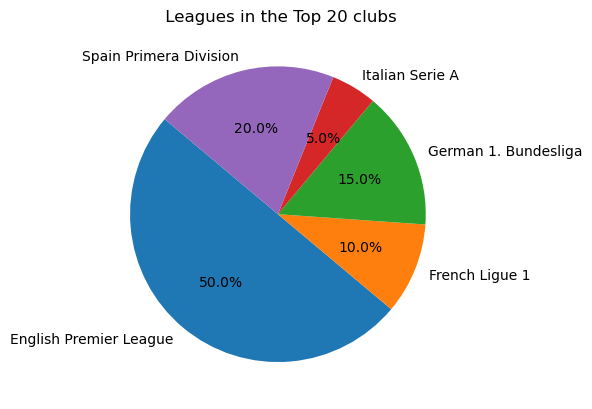

In [201]:
df_group = df[['league_name','club_name','value_eur']].sort_values(by = 'value_eur',ascending=False)
top_20_club = df_group.head(20)
club_league = top_20_club.groupby('league_name')['club_name'].count()
labels=club_league.index
plt.pie(club_league,labels= labels,autopct='%1.1f%%',startangle=140)
plt.title(' Leagues in the Top 20 clubs')
plt.show()

**1.6** Filter the dateset for the 1000 most valuable players. Plot the minimum, the median, the 95%-quantile, and maximum of the overall player skill ("overall") for each jersey number ('team_jersey_number') group (for jersey numbers from 1 to 15). (Replicate ``'overall.pdf'.``)

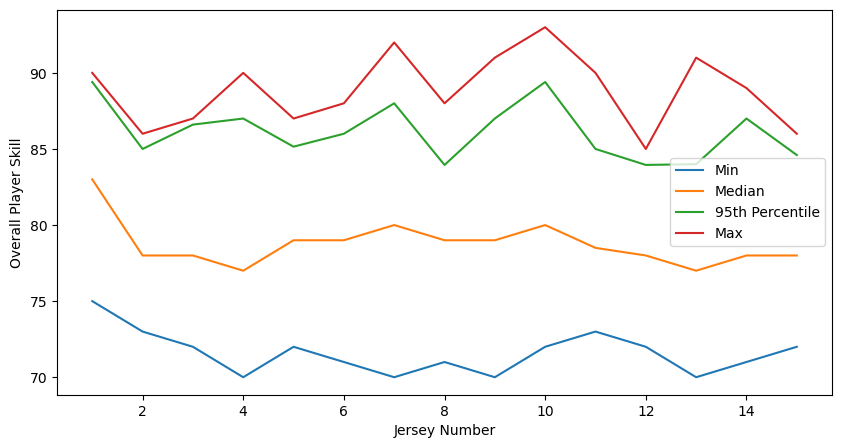

In [243]:
top_1000_players = df[['short_name','wage_eur','team_jersey_number','overall']].sort_values(by = 'wage_eur',ascending = False).head(1000)
grouped_player = top_1000_players.groupby('team_jersey_number')
jersey_filtered_players = top_1000_players[top_1000_players['team_jersey_number'].between(1, 15)]

jersey_numbers = []
min_values = []
median_values = []
percentile_95_values = []
max_values = []

for jersey_number in range(1, 16):
    jersey_data = jersey_filtered_players[jersey_filtered_players['team_jersey_number'] == jersey_number]
    
    min_value = jersey_data['overall'].min()
    median_value = jersey_data['overall'].median()
    percentile_95 = np.percentile(jersey_data['overall'], 95)
    max_value = jersey_data['overall'].max()
    
    jersey_numbers.append(jersey_number)
    min_values.append(min_value)
    median_values.append(median_value)
    percentile_95_values.append(percentile_95)
    max_values.append(max_value)


results_df = pd.DataFrame({
    'Jersey Number': jersey_numbers,
    'Min': min_values,
    'Median': median_values,
    '95th Percentile': percentile_95_values,
    'Max': max_values
})

results_df.set_index('Jersey Number', inplace=True)

plt.figure(figsize=(10, 5))
results_df.plot(kind='line', ax=plt.gca())
plt.xlabel('Jersey Number')
plt.ylabel('Overall Player Skill')
plt.show()

***1.7***  Print the 3 most frequent jersey numbers ('team_jersey_number') for each team position ('team_position'). Store your results in dataframe and sort the team positions by their most frequent jersey number.

In [254]:
jersey_num = df.groupby(['team_position', 'team_jersey_number']).size().reset_index(name='count')
jersey_num= jersey_num.sort_values(['team_position','count'], ascending= [True, False])

df_new = pd.DataFrame(columns=['team_position', 'most_frequent_jersey_numbers'])
for position, group in jersey_num.groupby('team_position'):
    top3_jersey = group['team_jersey_number'].head(3).tolist()
    df_new = df_new.append({'team_position': position, 'most_frequent_jersey_numbers': top3_jersey},ignore_index=True)
    
df_new = df_new.sort_values(by='most_frequent_jersey_numbers')
print(df_new)

   team_position most_frequent_jersey_numbers
5             GK            [1.0, 30.0, 13.0]
17            RB             [2.0, 22.0, 4.0]
26           RWB            [2.0, 23.0, 11.0]
15           LWB             [3.0, 5.0, 14.0]
7             LB            [3.0, 23.0, 15.0]
1             CB              [4.0, 5.0, 6.0]
18           RCB              [5.0, 4.0, 3.0]
8            LCB              [5.0, 4.0, 3.0]
2            CDM              [6.0, 8.0, 4.0]
6            LAM            [7.0, 10.0, 14.0]
25            RW            [7.0, 11.0, 10.0]
23            RM            [7.0, 11.0, 10.0]
4             CM              [8.0, 4.0, 7.0]
10           LDM              [8.0, 6.0, 5.0]
19           RCM              [8.0, 6.0, 7.0]
20           RDM             [8.0, 6.0, 21.0]
22            RF             [8.0, 9.0, 11.0]
9            LCM             [8.0, 10.0, 6.0]
24            RS             [9.0, 7.0, 11.0]
27            ST            [9.0, 10.0, 11.0]
13            LS             [9.0,

C:\Users\Sabrina\AppData\Local\Temp\ipykernel_9264\1990249953.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'team_position': position, 'most_frequent_jersey_numbers': top3_jersey},ignore_index=True)
C:\Users\Sabrina\AppData\Local\Temp\ipykernel_9264\1990249953.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'team_position': position, 'most_frequent_jersey_numbers': top3_jersey},ignore_index=True)
C:\Users\Sabrina\AppData\Local\Temp\ipykernel_9264\1990249953.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'team_position': position, 'most_frequent_jersey_numbers': top3_jersey},ignore_index=True)
C:\Users\Sabrina\AppData\Local\Temp\ipykernel_

***1.8*** Add lines of code in the following template to replicate ``'potential.pdf'``. Explain precisely the line where group_index is determined and why this determination is not computational efficient.

In [3]:
#Create a matrix filled with zeros and dimension 100x100
matrix=np.zeros((100,100))
limit_matrix=np.zeros_like(matrix)

for ov,pot in zip(df['overall'],df['potential']):
    # Increase the value in the matrix in ov row and the pot column by 1
        matrix[ov,pot]+=1

color_limits=[0,1,5,20,50,100]


# Iterate over ov grid
for ov in range(100):
    # Iterate over pot grid
    for pot in range(100):
        group_index = [v for v,value in enumerate(color_limits) if value<=matrix[ov,pot]][-1]
        # Store the group index to limit matrix
        limit_matrix[ov, pot] = group_index

# Create the figure


fig = px.imshow(limit_matrix,color_continuous_scale='RdBu_r',
                labels=dict(x="Overall Player skill", y="Player potential", color="Count greater than"))
fig.update_xaxes(side="top")
# Show the figure
fig.show()


NameError: name 'df' is not defined